<a href="https://colab.research.google.com/github/gitevaishnavi/gitevaishnavi/blob/main/Sales_prediction_using_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Read  Data
df = pd.read_csv('/content/Advertising.csv')

In [27]:
df.shape

(200, 5)

In [5]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
df.sample(5)

,Unnamed: 0,TV,Radio,Newspaper,Sales
14,15,204.1,32.9,46.0,19.0
191,192,75.5,10.8,6.0,9.9
140,141,73.4,17.0,12.9,10.9
199,200,232.1,8.6,8.7,13.4
118,119,125.7,36.9,79.2,15.9


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [8]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [9]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [10]:
df.isnull().sum()

,0
Unnamed: 0,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [11]:
df[df.duplicated()]

,Unnamed: 0,TV,Radio,Newspaper,Sales


<Axes: xlabel='TV', ylabel='Sales'>

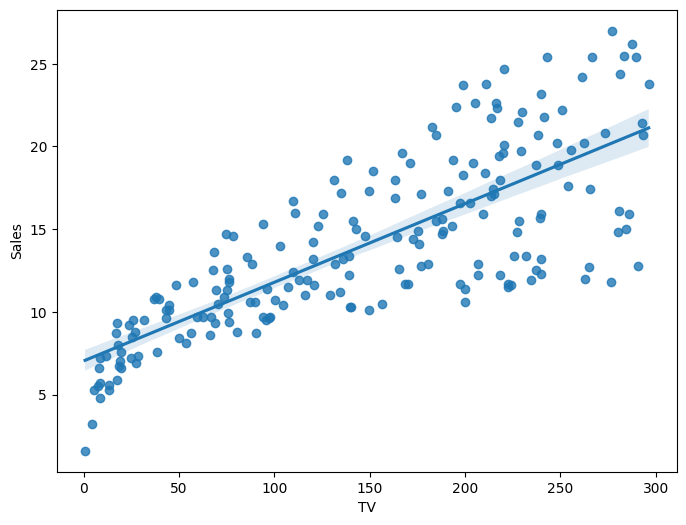

In [12]:
plt.figure(figsize=(8,6))
sns.regplot(x='TV',y='Sales',data=df)

<Axes: xlabel='Newspaper', ylabel='Sales'>

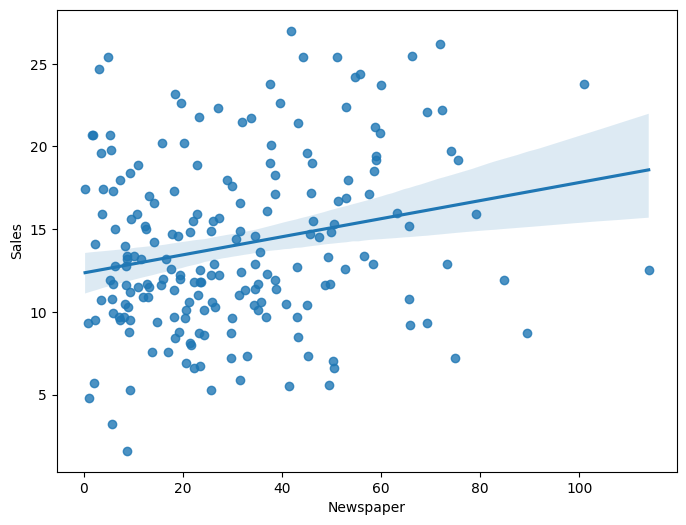

In [13]:
plt.figure(figsize=(8,6))
sns.regplot(x='Newspaper',y='Sales',data=df)

<Axes: xlabel='Radio', ylabel='Sales'>

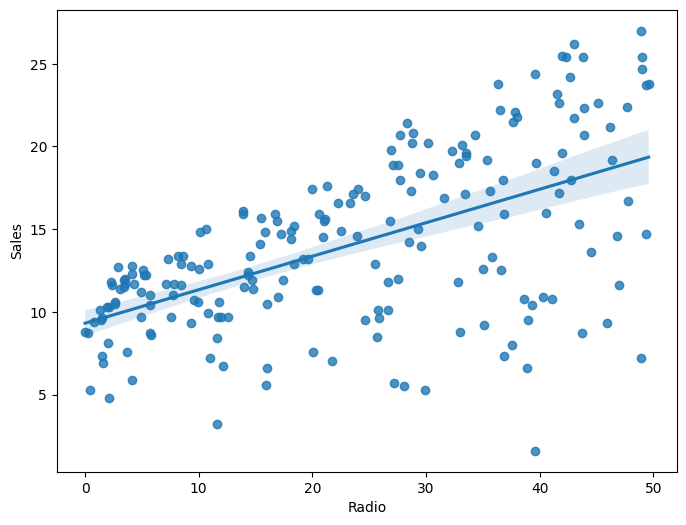

In [14]:
plt.figure(figsize=(8,6))
sns.regplot(x='Radio',y='Sales',data=df)

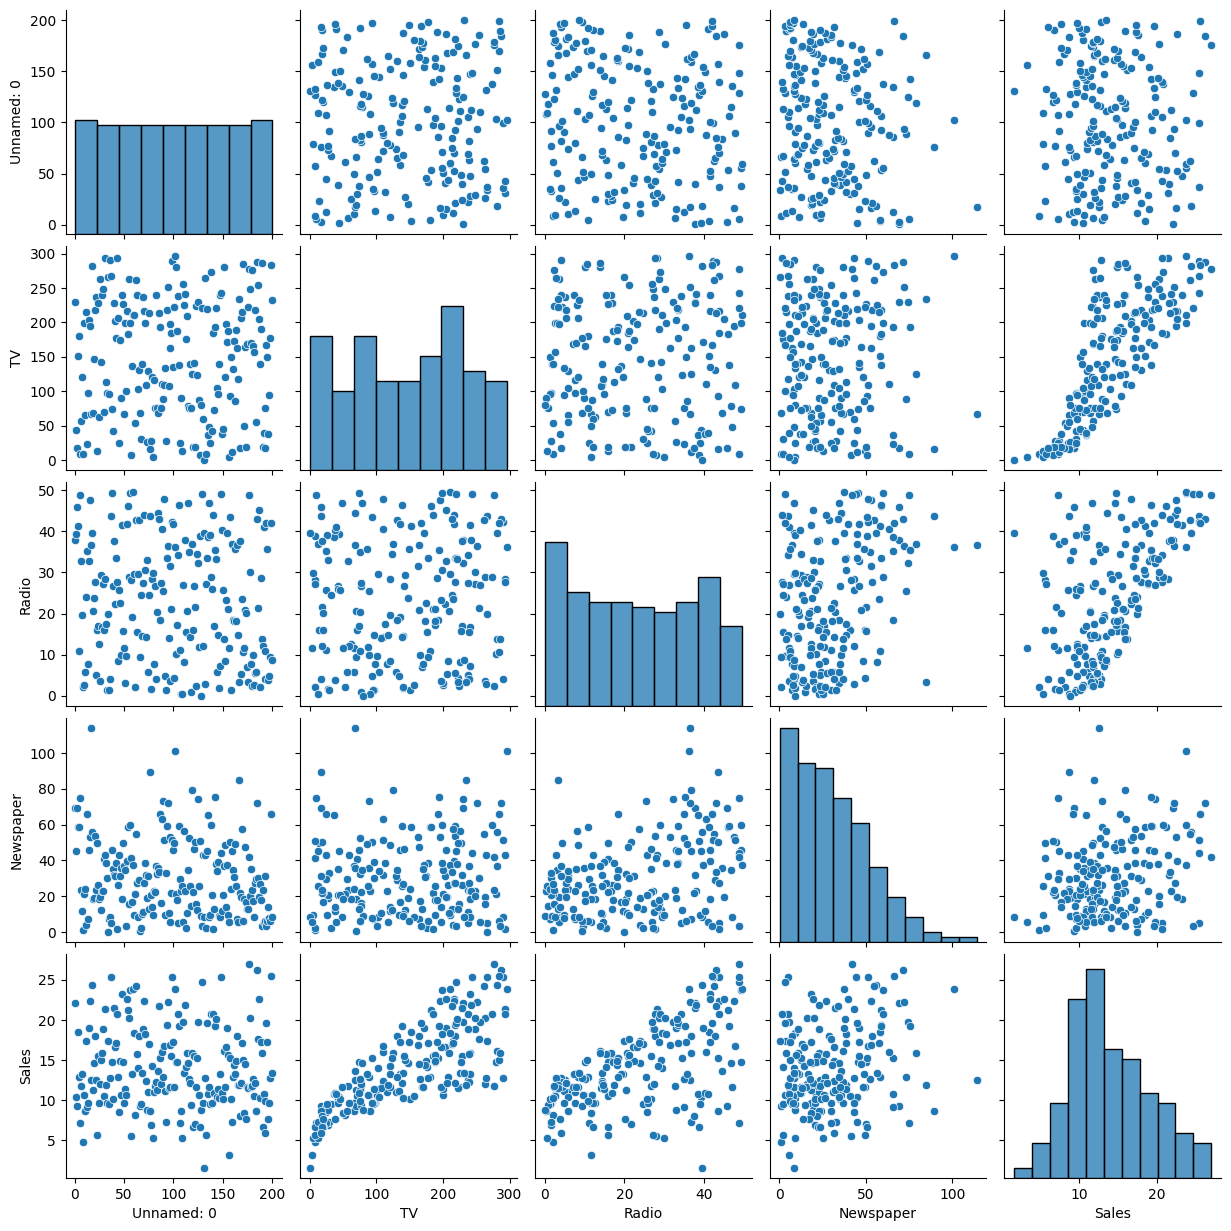

In [15]:
sns.pairplot(df)

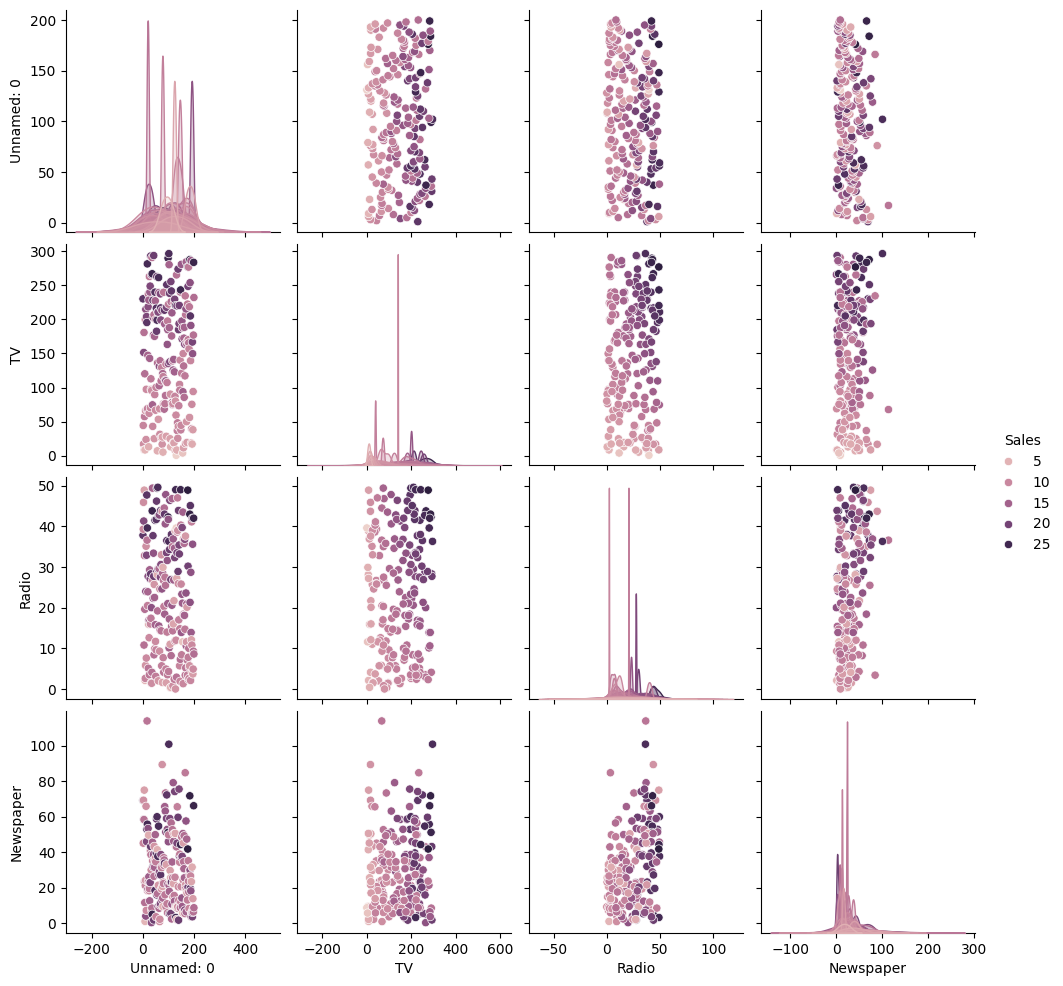

In [16]:
sns.pairplot(data = df , hue = 'Sales')

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [18]:
x=df[ ['Unnamed: 0','TV', 'Radio', 'Newspaper']]
y=df[[ 'Sales' ]]

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OrdinalEncoder
scaler = StandardScaler()
x= scaler.fit_transform(x)

In [20]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=.2,shuffle=True)

In [28]:
print(x_train)

[[-1.35967688e+00  1.05509347e+00 -1.22649795e+00 -3.24708413e-01]
 [-1.39431833e+00  3.00679600e-03  4.29449843e-02 -5.27248393e-01]
 [-7.88092969e-01  1.35051848e+00  3.73810430e-01 -6.74550196e-01]
 [ 1.58484630e+00 -8.35393020e-01 -8.41613655e-01 -1.13026515e+00]
 [ 8.92017316e-01 -3.04095087e-01 -1.00367020e+00  8.35293289e-01]
 [-1.55020485e+00 -9.45155670e-01 -1.17923146e+00 -2.92486143e-01]
 [ 8.74696592e-01  1.56070228e+00 -6.32290618e-01  2.96721070e-01]
 [ 8.22734418e-01  1.12281936e+00  1.73778635e+00  6.32753309e-01]
 [-2.59810869e-02  1.66579418e+00  1.28537849e+00  9.50372823e-01]
 [ 5.10961375e-01 -1.02105537e+00 -7.60585383e-01  5.77515133e-01]
 [-9.78620939e-01  6.98948705e-01 -1.00367020e+00 -1.91216154e-01]
 [ 1.29039398e+00  8.79940308e-01 -1.34128800e+00 -8.03439274e-01]
 [-5.97564998e-01 -9.11292725e-01 -9.42898996e-01 -1.36502740e+00]
 [ 4.93640651e-01  8.55418865e-01  1.73778635e+00 -1.25915423e+00]
 [ 1.01326239e+00 -1.58037782e+00  9.20751268e-01  6.74181942e

In [29]:
print(y_train)

     Sales
21    12.5
19    14.6
54    20.2
191    9.9
151   11.6
..     ...
23    15.5
134   10.8
164   11.9
107    8.7
175   27.0

[160 rows x 1 columns]


In [21]:
model = LinearRegression()

model.fit(x_train,y_train)

LinearRegression()

In [22]:
y_pred = model.predict(x_test)

In [23]:
from sklearn.metrics import r2_score
print(f''' The train accuracy : {r2_score(y_train,model.predict(x_train))}
The test accuracy : {r2_score(y_test , y_pred)}''')

 The train accuracy : 0.8963741647221707
The test accuracy : 0.8842939943034812


In [24]:
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(x_train,y_train)

RandomForestRegressor()

In [25]:
random_f_pred = random_forest.predict(x_test)

In [30]:
print(x_test)

[[-1.5155634  -1.4390876   0.79920886  1.62704048]
 [ 1.6541292  -1.27094056 -1.32103093 -0.771217  ]
 [ 0.33775413 -1.49046586 -0.49049114 -0.37994659]
 [-0.16454688 -0.14879261 -1.24000266 -0.97836017]
 [-0.70148935  0.74332084  0.42107692 -0.97836017]
 [-0.19918833 -0.68592899  0.15098268  1.97227908]
 [ 1.08254529  0.48292647 -0.34869167 -0.2280416 ]
 [-0.00866036 -0.13828342  1.24486436  0.70640421]
 [ 0.40703703 -0.27957364  0.76544708 -0.83566154]
 [-0.85737587  0.61604287 -1.36154507  0.18624472]
 [ 1.46360123  1.24659427 -0.13261627 -0.02550162]
 [-0.35507485 -0.36247947 -1.05093669 -0.34312114]
 [-1.48092195  0.66625345  0.65065703  0.71100739]
 [ 0.47631993 -0.7805117  -1.57086811 -0.98296335]
 [ 0.37239558 -1.49747198 -0.10560685  0.91354737]
 [ 1.60216702 -1.51615499 -1.29402151  0.04814928]
 [ 0.6668479  -1.21489154  0.1779921  -0.46280385]
 [ 0.70148935 -0.85991446 -0.42296758 -0.81264564]
 [ 0.68416862  0.4420574   1.39341619 -1.32820195]
 [-0.56292355 -0.09040823 -0.59

In [31]:
print(y_test)

     Sales
12     9.2
195    7.6
119    6.6
90    11.2
59    18.4
88    12.9
162   14.9
99    17.2
123   15.2
50    11.4
184   17.6
79    11.0
14    19.0
127    8.8
121    7.0
192    5.9
138    9.6
140   10.9
139   20.7
67    13.4
178   11.8
177   11.7
49     9.7
24     9.7
161   13.3
156   15.3
35    12.8
111   21.8
170    8.4
48    14.8
7     13.2
22     5.6
76     6.9
61    24.2
91     7.3
157   10.1
104   20.7
185   22.6
4     12.9
6     11.8


In [32]:
r2_score(y_test,random_f_pred)

0.9745570670765838